# Imports

In [1]:
import os
os.chdir("/Users/sibsankarsingha/_Documents/Academic/project/Functional_anomaly_detection/Robot_Torque_Anomaly") 

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tools.functions import *
from tools.DepthFunc import DepthFunc


## import the processed data

In [3]:
cleaned_data = pd.read_parquet("processed_data/A00003Hack_cleaned_data_60min.parquet")

## Set reference and query for depth computation

In [4]:
ref_data = cleaned_data[cleaned_data['case_id'] <= 50].copy()
query_data = cleaned_data[cleaned_data['case_id'] < 73].copy()

## Compute depth

#### load data in the model and compute depth value and optimal directions


In [5]:
value_cols = ['value_1', 'value_2', 'value_3', 'value_4', 'value_5', 'value_6', 'value_7']

model=DepthFunc().load_dataset(ref_data, timestamp_col = 'dup_timestamp', value_cols = value_cols, interpolate_grid=False)

depth_value, depth_dir = model.projection_based_func_depth(query_data, output_option = "final_depth_dir", interpolation = False)

timestamp_col is set to dup_timestamp
value_cols is set to ['value_1', 'value_2', 'value_3', 'value_4', 'value_5', 'value_6', 'value_7']
case_id is set to case_id
iteration =  0
option=  2


## depth values over entire time window

In [6]:
plt.figure(figsize=(24, 10))
depth_value_at_time = query_data["case_id"].map(lambda i: depth_value[i-1])
plt.scatter(query_data.index, depth_value_at_time, s=0.5, label = 'depth of signals')
plt.scatter(query_data.index, depth_value_at_time.rolling(window=360).mean(), s=1, color='r', label = '60 days moving average')
#plt.scatter(cleaned_data.index, Depth_val.rolling(window=12*24*60).mean(), s=1, color='r', label = '60 days moving average')
plt.legend()

NameError: name 'plt' is not defined

## impact of each axis (values of all axes together form a unit vector )


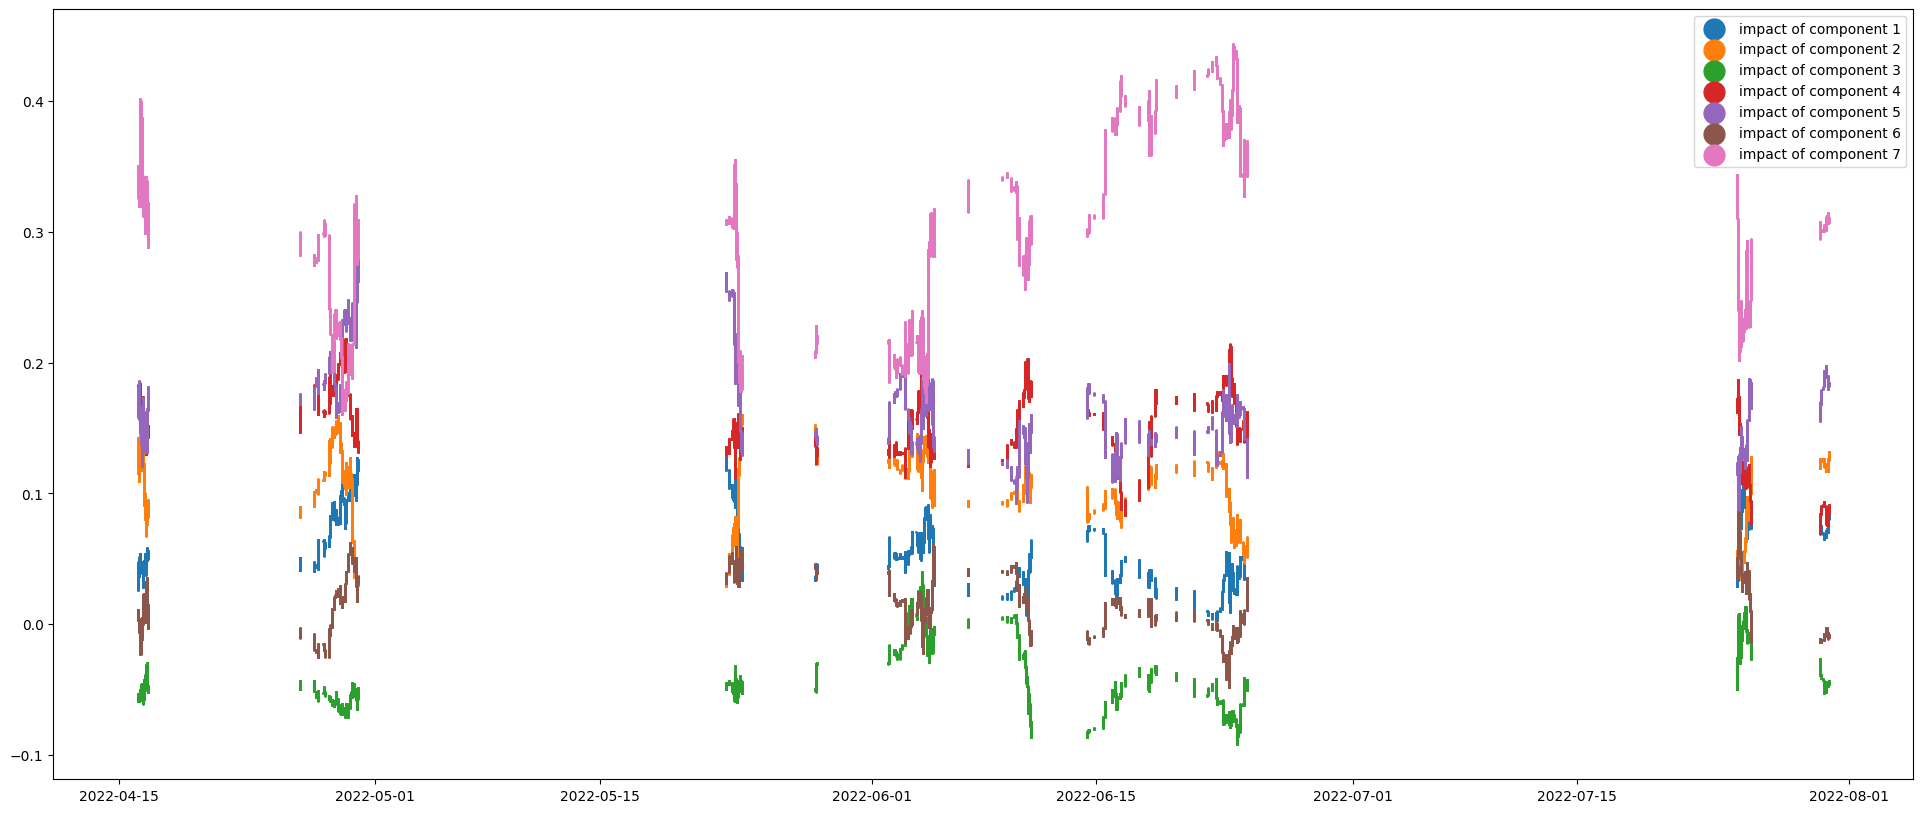

In [ ]:
depth_dir_at_time = depth_dir.reshape(-1, depth_dir.shape[2])
plt.figure(figsize=(24, 10))
for i in range(depth_dir_at_time.shape[1]):
    #plt.scatter(query_data.index, depth_dir_at_time[:, i], s=0.5, label = f'direction {i+1} of signals')
    plt.scatter(query_data.index, pd.Series(depth_dir_at_time[:, i]).rolling(window=6*360).mean(), s=1, label = 'impact of component '+ str(i+1))
    plt.legend(markerscale = 15)